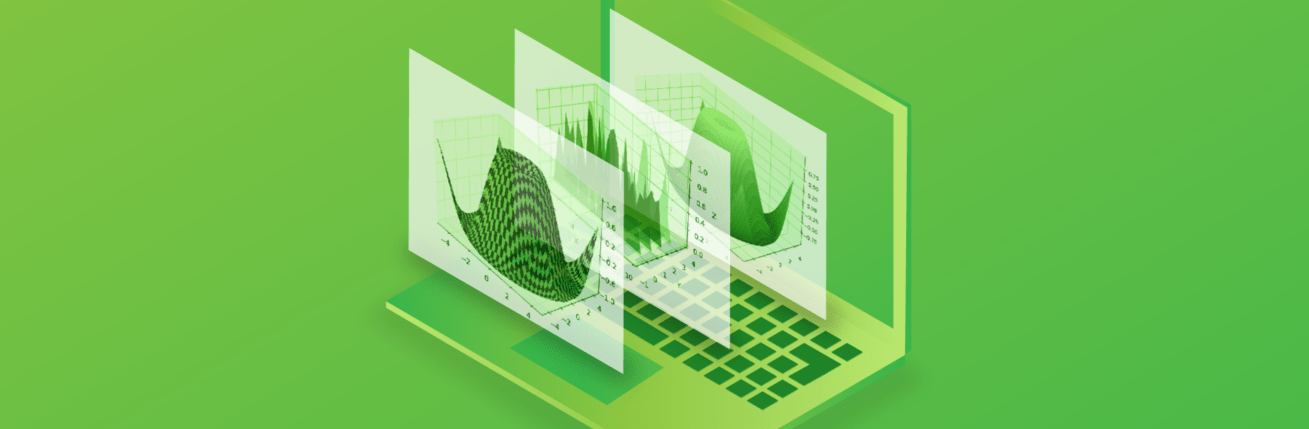

# Title

In [15]:
# Análise dos dados das vendas

# Head

In [11]:
# by genaclm in 06/12/2021 at 07:49h
# Envio de relatório ao shopping
# Envio de sms
# Objetivo: encontrar padrão de comportamento nos dados

# Local files

In [1]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 2656-7D0D

 Pasta de C:\Users\geanc\Downloads\DATA SCIENCE\python_project

21/02/2022  07:04    <DIR>          .
21/02/2022  07:04    <DIR>          ..
22/07/2021  19:49                66 .gitattributes
23/07/2021  19:12    <DIR>          .ipynb_checkpoints
21/02/2022  07:04         4.197.791 automation.ipynb
21/09/2021  07:04            43.582 geckodriver.log
14/10/2021  09:11            19.007 graphic.png
14/10/2021  09:06           224.845 img.png
22/07/2021  19:49            35.802 LICENSE
14/10/2021  09:17             1.233 README.md
               7 arquivo(s)      4.522.326 bytes
               3 pasta(s)   626.389.307.392 bytes dispon¡veis


# Import libs

In [1]:
import pandas as pd
import tabula as tb
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from selenium import webdriver
from datetime import date
import os, pyautogui, pyperclip, time, smtplib, email.message, locale

# Saíde de vários Outputs em uma mesma célula
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<center style="font-size:10pt; background-color:green"><h1></h1></center>

# Import data

In [2]:
# ETAPA 0/13
# - - -
# Automação para encaminhar relatório de vendas semanais ao Shopping
# python project
# - - -
# 12/06/2021 -> (início de tudo!)
# - - -
# MOTIVAÇÃO:
# 01 - multa de R$300 se não entregar o faturamento semanal até as 14h de cada segunda-feira
# 02 - aprendizado com o python (estudo com vários vídeos do youtube)
# 03 - gráfico de barras e segmentação para melhor análise dos dados diários
# 04 - análise exploratória do data frame com dados tratados
# 05 - interação com o mapa google (mapa de calor) - em estudo para aplicar na capilaridade
# 06 - Dashboard em tempo real (ainda estudando...)
# 07 - agendar tarefa (Ok! Implementar se necessário no sistema operacional)
# 08 - envio de relatório formatado por e-mail para Shopping (tarefa completa e bem sucedida)
# 09 - segurança da informação com .txt (dados sensíveis separados do script)
# 10 - Machine Learning - desafio com algorítmo de regressão linear (ainda em estudo)
# 11 - Estética, melhores práticas e perfomace do código
# - - -
# OBJETIVOS:
# 01 - conhecer melhor scikit-learn, PyTorch, TensorFlow, IA;
# 02 - RECOMENDAÇÃO DE COMPRA PARA CLIENTE;
# 03 - RECOMENDAÇÃO ALIMENTAR PARA AS PESSOAS;
# 04 - RECOMENDAÇÃO DISCIPLINAR PARA AS PESSOAS;
# 05 - RECOMENDAÇÃO DE ESTUDO PARA AS PESSOAS;
# 06 - RECOMENDAÇÃO DE ATIVIDADES PARA AS PESSOAS;
# 07 - RECOMENDAÇÃO DE educação financeira PARA AS PESSOAS;
# 08 - CRIAR UMA BIBLIOTECA FINANCEIRA para import e análise dos principais indicadores
# 09 - Web Apps com Streamlit
# - - -
# by geanclm in 12/07/2021 23:32h 
# - - -
# LER PDF enviado pelo Shopping e extrair dados para gerar o ralatório semanal de VENDAS
# - - -

# # LSITANDO ARQUIVOS DA PASTA - PRIMEIRA FORMA DE PEGAR O ARQUIVO
# for i in os.listdir(FileDir):
#     lista.append(i)
# file = lista [1] #arquivo pdf que deve ser utilizado
# file
# # - - -

# FILTRANDO ARQUIVO .PDF DA PASTA - SEGUNDA FORMA DE LER O ARUIVO
FileDir = r'C:\Users\geanc\Downloads\DATA SCIENCE\geanclm\data\data_python_project_geanclm'
FileExt = r'.pdf'
lista = []
lista = [_ for _ in os.listdir(FileDir) if _.endswith(FileExt)]
file = "".join(lista) # necessário converter variável "file" para string

char = '\\'
DataFile = 'data.txt'
DirDataFile = FileDir+char+DataFile
FilePath = FileDir+char+file

# exibir data frame do arquivo .pdf
lista_tabelas = tb.read_pdf(FilePath, pages="1")
for tabela in lista_tabelas:
    df = pd.DataFrame(tabela)

# QUANDO O ARQUIVO APRENSENTAR MAIS DE UMA DATA
# DUAS LINHAS DENTRO DA MESAMA CÉDULA DA TABELA PDF
# df.loc[0] = df.loc[1] # descomentar esta linha para considerar a linha 1
display(df)

# definindo principais variáveis
dataf = (df.loc[0,'Período'][5:15])
datai = (df.loc[0,'Período'][:2])+'/'+(df.loc[0,'Período'][8:15])
ano = (df.loc[0,'Período'][11:15])
datai,dataf,ano

,Período,Data da Entrega,Dia da Semana,Até às
0,18 a 24/04/2022,25/04/2022,Segunda feira,14:00


('18/04/2022', '24/04/2022', '2022')

# Automation

In [ ]:
# ETAPA 1/13
# - - -
# E tudo começou aqui quando pensei em automatizar
# a abertura do sistema na nuvem!
# Abrindo o sistema principal de gestão - Ishop
# - - -
# by geanclm in 17/05/2021
# - - -

# pyautogui.hotkey('ctrl','t')

with open(DirDataFile,'r') as data : link = (data.readlines()[22])
with open(DirDataFile,'r') as data : login = (data.readlines()[23])
with open(DirDataFile,'r') as data : senhaa = (data.readlines()[24])
with open(DirDataFile,'r') as data : senhai = (data.readlines()[3])
senhai = senhai[:7]

nav = webdriver.Firefox()
nav.get(link)

nav.find_element_by_xpath('//*[@id="login"]').click()
nav.find_element_by_xpath('//*[@id="login"]').send_keys(login)
pyautogui.press('tab')
nav.find_element_by_xpath('//*[@id="password"]').click()
nav.find_element_by_xpath('//*[@id="password"]').send_keys(senhaa)
pyautogui.press('enter')
time.sleep(15)
pyautogui.click(890,285, clicks=1)
time.sleep(5)
pyautogui.click(883,405, clicks=1)
time.sleep(30)

# abrindo o sitema Ishop na nuvwm
pyautogui.click(594,171, clicks=2)
time.sleep(10)
pyperclip.copy(senhai)
pyautogui.hotkey('ctrl','v')
pyautogui.press('tab')
pyautogui.press('enter')

In [ ]:
# ETAPA 2/13
# EXTRAIR VENDAS DO SITE SHOP UP

# autenticação sistema Shop UP
with open(DirDataFile,'r') as data : logins = (data.readlines()[2])
with open(DirDataFile,'r') as data : senhas = (data.readlines()[3])
# - - -

nav = webdriver.Firefox()

with open(DirDataFile,'r') as data : link2 = (data.readlines()[16])
with open(DirDataFile,'r') as data : file_man = (data.readlines()[17])
with open(DirDataFile,'r') as data : file_mag = (data.readlines()[18])

with open(DirDataFile,'r') as data : navget = (data.readlines()[19])
nav.get(navget)

time.sleep(3)
nav.find_element_by_xpath('//*[@id="alt-autenticacao"]/div[1]/div[2]/input').click()
nav.find_element_by_xpath('//*[@id="alt-autenticacao"]/div[1]/div[2]/input').send_keys(logins)
nav.find_element_by_xpath('//*[@id="alt-autenticacao"]/div[1]/div[3]/input').click()
nav.find_element_by_xpath('//*[@id="alt-autenticacao"]/div[1]/div[3]/input').send_keys(senhas)
nav.find_element_by_xpath('//*[@id="alt-autenticacao"]/div[1]/button').click()
time.sleep(3)

pyautogui.click(621,88, clicks=1)
pyperclip.copy(link2)
pyautogui.hotkey('ctrl','v')
pyautogui.press('enter')
time.sleep(2)

# acessando o filtro de datas
pyautogui.click(185,280, clicks=1)
time.sleep(2)
pyautogui.click(982,287, clicks=1)
time.sleep(2)
pyautogui.click(798,534, clicks=1)
time.sleep(2)

# cola data inicial
pyautogui.click(646,400, clicks=1)
time.sleep(2)
pyautogui.click(646,400, clicks=1)
time.sleep(2)
pyperclip.copy(datai)
pyautogui.hotkey('ctrl','v')
time.sleep(2)
pyautogui.click(944,658, clicks=1)

# cola data final
pyautogui.click(973,391, clicks=1)
time.sleep(2)
pyautogui.click(973,391, clicks=1)
time.sleep(2)
pyperclip.copy(dataf)
pyautogui.hotkey('ctrl','v')
time.sleep(2)
pyautogui.click(944,658, clicks=1)

time.sleep(1)
pyautogui.click(1117,604, clicks=1)
time.sleep(2)
# - - -

# salvando arquivo .txt do faturamento
pyautogui.hotkey('ctrl','s')
time.sleep(2)
pyautogui.click(543,462, clicks=1)
time.sleep(2)
pyautogui.click(515,527, clicks=1)

time.sleep(3)
pyautogui.click(567,55, clicks=1)
pyperclip.copy(FileDir)
time.sleep(2)
pyautogui.hotkey('ctrl','v')
time.sleep(3)
pyautogui.press('enter')
time.sleep(3)
pyautogui.click(580,435, clicks=1)
time.sleep(2)
pyperclip.copy(file_man[:10])
pyautogui.hotkey('ctrl','v')
time.sleep(2)
pyautogui.press('enter')
time.sleep(2)
pyautogui.hotkey('alt','s')
time.sleep(2)
# - - -

# PB-JPA-MAG - lendo vendas
pyautogui.click(162,278, clicks=1)
time.sleep(2)
pyautogui.click(626,521, clicks=1)
time.sleep(2)
pyautogui.click(606,586, clicks=1)
time.sleep(2)
pyautogui.click(1103,605, clicks=1)
time.sleep(2)

# PB-JPA-MAG - salvando arquivo .txt do faturamento
pyautogui.hotkey('ctrl','s')
time.sleep(2)
pyperclip.copy(file_mag[:10])
pyautogui.hotkey('ctrl','v')
time.sleep(2)
pyautogui.press('enter')
time.sleep(2)
pyautogui.hotkey('alt','s')
time.sleep(2)

# fechando a janela do firefoz
pyautogui.click(1582,37, clicks=1)
time.sleep(2)

# avisar que acabo 
pyautogui.alert('''

∩ │◥███◣ ╱◥███◣
╱◥◣ ◥████◣▓∩▓│∩ ║
│╱◥█◣║∩∩∩ ║◥█▓ ▓█◣
││∩│ ▓ ║∩田│║▓ ▓ ▓∩ ║
|-------------------|

-=-=-=-=-=-=-=-=-=-=-=-=-
ETAPA 2/11
concluída com sucesso!
Tome um café e continue
produzindo para um mundo melhor!
EXCELENTE TRABALHO!
-=-=-=-=-=-=-=-=-=-=-=-=-
''')

In [5]:
# verificação das variáveis lidas no .pdf eniado pelo shopping
datai, dataf, ano

('28/03/2022', '31/03/2022', '2022')

# Load data

In [4]:
# ETAPA 3/13
# - - -
# LER arquivos *.txt com relatório de VENDAS
# - - -
# Faturamento semanal - gerar dataframe - relatório para o Shopping
# by geanclm in 12/06/2021
# - - -

# leitura dos arquivos .txt
pd.options.display.float_format = "{:.2f}".format
man = open(r'C:\Users\geanc\Downloads\DATA SCIENCE\geanclm\data\data_python_project_geanclm\pb-jpa-man.txt','r', encoding='utf-8')
mag = open(r'C:\Users\geanc\Downloads\DATA SCIENCE\geanclm\data\data_python_project_geanclm\pb-jpa-mag.txt','r', encoding='utf-8')

# man_df = pd.DataFrame(columns=['DATA','VENDAS_MAN']) --UNDO
man_df = pd.DataFrame(columns=['DATA','SEMANA','VENDAS_MAN'])
mag_df = pd.DataFrame(columns=['DATA','VENDAS_MAG'])

# extraindo dados do arquivo pb-jpa-man.txt
line=0
ano_string = '/'+ano+' ('
for linha in man:
    line=line+1
    linha = linha.rstrip()
    if ano_string in linha:
#         man_df.loc[line] = linha[:10],linha[20:] --UNDO
          man_df.loc[line] = linha[:10],linha[12:15],linha[20:]
man.close()
# - - -
        
# extraindo dados do arquivo pb-jpa-mag.txt
line=0
ano_string = '/'+ano+' ('
for linha in mag:
    line=line+1
    linha = linha.rstrip()
    if ano_string in linha:
        mag_df.loc[line] = linha[:10],linha[20:]
mag.close()
# - - -

# concatenando os dois dataframes
man_mag_df = pd.merge(man_df, mag_df, how = 'inner', on = 'DATA')

# salvando strings para colar no site final (deep copy)
import copy
man_mag_df_string = copy.deepcopy(man_mag_df)

# TERCERIRA ETAPA DO SCRIPT
# - - - CONVERTENDO valores STRING PARA valores float
man_mag_df['VENDAS_MAN'] = man_mag_df['VENDAS_MAN'].apply(lambda x: str(x).replace("." , "_").replace(",", ".").replace("_", ""))
man_mag_df['VENDAS_MAN'] = man_mag_df['VENDAS_MAN'].astype('float64')
man_mag_df['VENDAS_MAG'] = man_mag_df['VENDAS_MAG'].apply(lambda x: str(x).replace("." , "_").replace(",", ".").replace("_", ""))
man_mag_df['VENDAS_MAG'] = man_mag_df['VENDAS_MAG'].astype('float64')

# - - - CONVERTENDO DATA STRING PARA DATA datatime
man_mag_df['DATA'] = pd.to_datetime(man_mag_df['DATA'], format ='%d/%m/%Y', dayfirst=True)
# - - -

# total das vendas no período selecionado
soma_man = man_mag_df['VENDAS_MAN'].sum()
soma_man_cifra = copy.deepcopy(soma_man)

soma_mag = man_mag_df['VENDAS_MAG'].sum()

# conversão para copiar no total do site http://webgim.manairashopping.com
soma_man_str = (f'{soma_man:,.2f}').replace("," , "_").replace(".", ",").replace("_", ".")
print ('total vendas PB-JPA-MAN (string) no período: R$',soma_man_str)
soma_mag_str = (f'{soma_mag:,.2f}').replace("," , "_").replace(".", ",").replace("_", ".")
print ('total vendas PB-JPA-MAG (string) no período: R$',soma_mag_str)

total vendas PB-JPA-MAN (string) no período: R$ 2.436,94
total vendas PB-JPA-MAG (string) no período: R$ 0,00


# Data preparation

In [6]:
# SE o arquivo .pdf INFORMATIVO NÃO CHEGAR A TEMPO MA SEGUNFA-FEIRA
# DEFINIR datai e dataf manualmente com este código
# by geanclm in 13/08/2021 at 08:02h

with open(r'C:\Users\geanc\Downloads\DATA SCIENCE\geanclm\data\data_python_project_geanclm\data.txt','r') as data : datai = (data.readlines()[0]) # data inicial
with open(r'C:\Users\geanc\Downloads\DATA SCIENCE\geanclm\data\data_python_project_geanclm\data.txt','r') as data : dataf = (data.readlines()[1]) # data final
datai = datai[:10] # tratamento para remover a quebra de página
dataf = dataf[:10] # tratamento para remover a quebra de página

# ajustar a variável 'ano' para concatenar data frame de anos diferentes
ano = datai[6:10]
# ano = dataf[6:10]

# variáveis lidas no arquivo .txt definidas manualmente
datai, dataf, ano

('01/04/2022', '03/04/2022', '2022')

In [5]:
print ('''
versão string pra copiar e colar no site do shopping :-|''')
man_mag_df_string

# conversão para copiar no total do site http://webgim.manairashopping.com
soma_man = (f'{soma_man:,.2f}').replace("," , "_").replace(".", ",").replace("_", ".")
print ('total vendas PB-JPA-MAN no período: R$',soma_man)


versão string pra copiar e colar no site do shopping :-|


,DATA,SEMANA,VENDAS_MAN,VENDAS_MAG
0,18/04/2022,seg,"353,60","0,00"
1,19/04/2022,ter,"135,70","0,00"
2,20/04/2022,qua,"375,50","0,00"
3,21/04/2022,qui,"878,62","0,00"
4,22/04/2022,sex,"129,00","0,00"
5,23/04/2022,sáb,"474,62","0,00"
6,24/04/2022,dom,"89,90","0,00"


total vendas PB-JPA-MAN no período: R$ 2.436,94


In [18]:
# imprimindo o dia da semana de cada registro no DATA FRAME e aplicar nome em português
dias = {'Sunday':'Domingo', 'Monday':'Segunda-feira',
        'Tuesday':'Terça-feira', 'Wednesday':'Quarta-feira',
        'Thursday':'Quinta-feira', 'Friday':'Sexta-feira','Saturday':'Sábado'}
man_mag_df['DATA'].dt.day_name().replace(dias)

0     Terça-feira
1    Quarta-feira
2    Quinta-feira
3     Sexta-feira
4          Sábado
5         Domingo
Name: DATA, dtype: object

# Data visualization

In [9]:
# ANÁLISE EXPLORATÓRIO das vendas
# by geanclm in 02/12/2021 at 06:31h

meses = 1

soma_man = man_mag_df['VENDAS_MAN'].sum()
soma_mag = man_mag_df['VENDAS_MAG'].sum()

# PB-JPA-MAN - melhor dia de venda
df_man_maior_venda_dia = man_mag_df.drop('VENDAS_MAG',1)
df_man_maior_venda_dia = df_man_maior_venda_dia.loc[man_mag_df['VENDAS_MAN'] >= man_mag_df['VENDAS_MAN'].max()]

# PB-JPA-MAG - melhor dia de venda
df_mag_maior_venda_dia = man_mag_df.drop('VENDAS_MAN',1)
df_mag_maior_venda_dia = df_mag_maior_venda_dia.loc[man_mag_df['VENDAS_MAG'] >= man_mag_df['VENDAS_MAG'].max()]

man_mes = soma_man/meses
mag_mes = soma_mag/meses

# PB-JPA-MAN - TOTAL de vendas no período
print (f'''PB-JPA-MAN de {datai} a {dataf}
total vendas: R$ {soma_man:,.2f}
média vendas no período: R$ {man_mes:,.2f}''')
print (f'''melhor dia: 
{df_man_maior_venda_dia}''')

print (f'''
''')

# PB-JPA-MAN - TOTAL de vendas no período
print (f'''PB-JPA-MAG  de {datai} a {dataf}
total vendas: R$ {soma_mag:,.2f}
média vendas no período: R$ {mag_mes:.2f}''')
print (f'''melhor dia:
{df_mag_maior_venda_dia}''')

PB-JPA-MAN de 01/04/2022 a 03/04/2022
total vendas: R$ 2,228.96
média vendas no período: R$ 2,228.96
melhor dia: 
        DATA SEMANA  VENDAS_MAN
1 2022-04-02    sáb     1320.90


PB-JPA-MAG  de 01/04/2022 a 03/04/2022
total vendas: R$ 0.00
média vendas no período: R$ 0.00
melhor dia:
        DATA SEMANA  VENDAS_MAG
0 2022-04-01    sex        0.00
1 2022-04-02    sáb        0.00
2 2022-04-03    dom        0.00


In [10]:
# ETAPA 513
# - - -
# Gerar dataframe para análise das vendas no período datai e dataf
# imprimir totais por loja e total geral de vendas
# - - -
# by geanclm in 12/06/2021
# - - -

# IMPRIMINDO TOTAIS DE VENDAS DAS DUAS UNIDADES
man_mag_df_total = copy.deepcopy(man_mag_df)
man_mag_df_total['TOTAL'] = man_mag_df_total['VENDAS_MAN']+man_mag_df_total['VENDAS_MAG']
man_mag_df_total.loc['TOTAL'] = man_mag_df_total[['VENDAS_MAN','VENDAS_MAG','TOTAL']].sum()

# substituindo nomes na coluna SEMANA
man_mag_df_total = man_mag_df_total.replace({'dom':'Domingo','seg':'Segunda-feira',
                    'ter':'Terça-feira', 'qua':'Quarta-feira','qui':'Quinta-feira',
                    'sex':'Sexta-feira','sáb':'Sábado'})

# CONVERTENDO STRING PARA DATETIME
# man_mag_df_total['DATA'] = pd.to_datetime(man_mag_df_total['DATA'])

# eliminando o retorno nulo da finção sum()
man_mag_df_total.at['TOTAL','DATA']='' #com esse recurso a DATA vira string
man_mag_df_total.at['TOTAL','SEMANA']=''

# DESTAQUE EM VERMELHO PARA OS DIAS DE MENOR VENDA
pd.set_option('display.precision',2)
man_mag_df_total.style.highlight_min(color = 'red', axis=1)

,DATA,SEMANA,VENDAS_MAN,VENDAS_MAG,TOTAL
0,2022-04-01 00:00:00,Sexta-feira,433.50,0.00,433.50
1,2022-04-02 00:00:00,Sábado,1320.90,0.00,1320.90
2,2022-04-03 00:00:00,Domingo,474.56,0.00,474.56
TOTAL,,,2228.96,0.00,2228.96


In [11]:
# ANALISANDO VENDA MENSAL por dia da semana de cada unidade
# Os indicadores verdes sinalizam a maior venda no respectivo dia
# by geanclm in 07/09/2021 at 13:22h
dfs = man_mag_df.groupby(['SEMANA']).sum()
dfs.style.highlight_max(color = 'lightgreen', axis=1)

,VENDAS_MAN,VENDAS_MAG
SEMANA,,
dom,474.56,0.00
sex,433.50,0.00
sáb,1320.90,0.00


In [8]:
# ETAPA 6/13
# - - -
# ANÁLISE DAS VENDAS POR DIA DA SEMANA
# DESTAQUE PARA OS DIAS DE MELHOR CONVERSÃO em cada loja
# QUESTIONAMNETO: MAN no geral vendeu menos, mas tem mais dias de boas vendas?
# O que fazer nos dias fracos para vender mais? mktd
# by geanclm in 12/06/2021
# - - -
vd = man_mag_df_total.drop(columns=['DATA','TOTAL']) # removendo colunas
vd = vd.drop('TOTAL',axis=0) # excluindo linha TOTAL
# vd.groupby('SEMANA').size() # verificar o total de cada dia da semana
# vd.groupby(['SEMANA','VENDAS_MAN','VENDAS_MAG']).sum()
vd = vd.groupby('SEMANA').agg({'VENDAS_MAN':'sum','VENDAS_MAG':'sum'})
vd.style.highlight_max(color = 'lightgreen', axis=1)

,VENDAS_MAN,VENDAS_MAG
SEMANA,,
Domingo,173.83,188.24
Quarta-feira,23.80,245.81
Quinta-feira,101.92,122.20
Segunda-feira,352.40,228.20
Sexta-feira,24.50,476.66
Sábado,399.00,320.40
Terça-feira,512.00,231.30


In [13]:
# dataframe formato string
man_mag_df_string

,DATA,SEMANA,VENDAS_MAN,VENDAS_MAG
0,01/03/2022,ter,"163,70","163,20"
1,02/03/2022,qua,"290,80","296,10"
2,03/03/2022,qui,"363,50","167,90"
3,04/03/2022,sex,"257,60","672,90"
4,05/03/2022,sáb,"242,14","265,90"
5,06/03/2022,dom,"423,50","712,80"


In [14]:
# dataframe formato date e float
man_mag_df

,DATA,SEMANA,VENDAS_MAN,VENDAS_MAG
0,2022-03-01,ter,163.70,163.20
1,2022-03-02,qua,290.80,296.10
2,2022-03-03,qui,363.50,167.90
3,2022-03-04,sex,257.60,672.90
4,2022-03-05,sáb,242.14,265.90
5,2022-03-06,dom,423.50,712.80


# Data graph

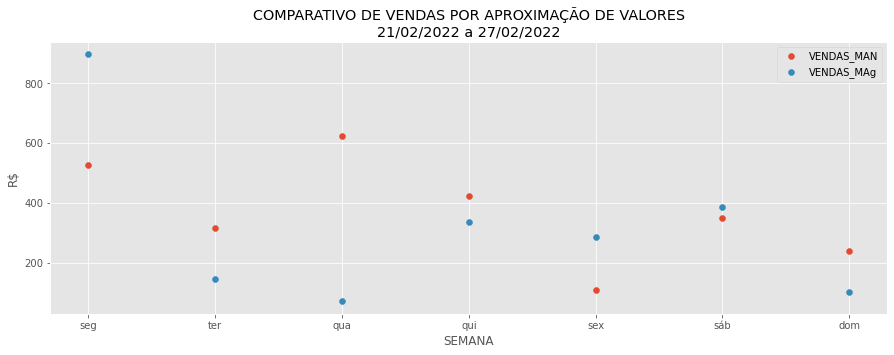

In [27]:
# GRÁFICO DE DISPERSÃO
plt.figure(figsize=(15,5))
plt.scatter(x=man_mag_df['SEMANA'], y = man_mag_df['VENDAS_MAN'],label="VENDAS_MAN")
plt.scatter(x=man_mag_df['SEMANA'], y = man_mag_df['VENDAS_MAG'],label="VENDAS_MAg")
plt.title(f'COMPARATIVO DE VENDAS POR APROXIMAÇÃO DE VALORES\n{datai} a {dataf}')
plt.ylabel('R$')
plt.xlabel('SEMANA')
plt.legend();

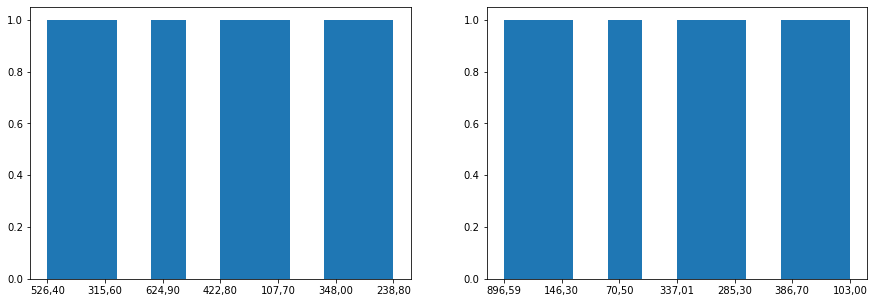

In [19]:
# gerar histograma das vendas das duas unidades
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(man_df.VENDAS_MAN);
plt.subplot(1,2,2)
plt.hist(mag_df.VENDAS_MAG);

In [21]:
# ETAPA 4/13
# - - -
# GERANDO gráfico Plotly - faturamento man
# - - -
# by geanclm
# - - -
# px.__version__
px.line(man_mag_df, x='SEMANA', y='VENDAS_MAN')

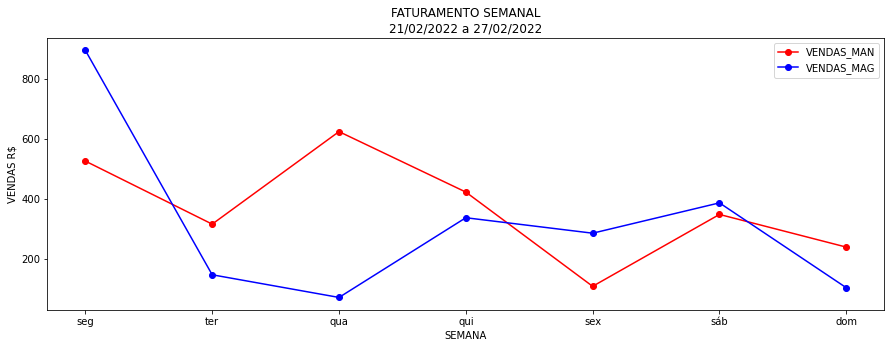

In [22]:
# ETAPA 4/13
# - - -
# GRÁFICO DE LINHAS
# Comparativo de vendas das duas unidades
# - - -
# by geanclm in 31/07/2021
# - - -
plt.figure(figsize=(15,5))
plt.plot(man_mag_df['SEMANA'], man_mag_df['VENDAS_MAN'], color='red', marker='o', linestyle='solid', label="VENDAS_MAN")
plt.plot(man_mag_df['SEMANA'], man_mag_df['VENDAS_MAG'], color='blue', marker='o', linestyle='solid', label="VENDAS_MAG")
plt.title(f'FATURAMENTO SEMANAL\n{datai} a {dataf}')
plt.ylabel('VENDAS R$')
plt.xlabel('SEMANA')
plt.legend();

[Text(0, 0, '21/02/2022'),
 Text(1, 0, '22/02/2022'),
 Text(2, 0, '23/02/2022'),
 Text(3, 0, '24/02/2022'),
 Text(4, 0, '25/02/2022'),
 Text(5, 0, '26/02/2022'),
 Text(6, 0, '27/02/2022')]

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '21/02/2022'),
  Text(1, 0, '22/02/2022'),
  Text(2, 0, '23/02/2022'),
  Text(3, 0, '24/02/2022'),
  Text(4, 0, '25/02/2022'),
  Text(5, 0, '26/02/2022'),
  Text(6, 0, '27/02/2022')])

Text(0, 1, '526.4')

Text(0, 1, '315.6')

Text(0, 1, '624.9')

Text(0, 1, '422.8')

Text(0, 1, '107.7')

Text(0, 1, '348.0')

Text(0, 1, '238.8')

Text(0, 1, '896.59')

Text(0, 1, '146.3')

Text(0, 1, '70.5')

Text(0, 1, '337.01')

Text(0, 1, '285.3')

Text(0, 1, '386.7')

Text(0, 1, '103.0')

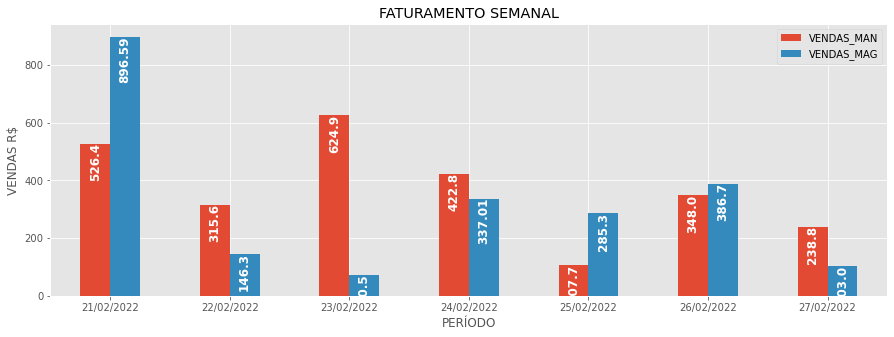

In [28]:
# ETAPA 7/13
# - - -
# GERAR GRÁFICO de barras para visualização das vendas diárias
# - - -
# by geanclm in 12/06/2021
# - - -
plt.style.use('ggplot')
plot = man_mag_df[['VENDAS_MAN','VENDAS_MAG']].plot(figsize=(15,5),
    kind="bar", width=0.5, ylabel='VENDAS R$', xlabel='PERÍODO', title='FATURAMENTO SEMANAL');
# plot = ax = man_mag_df[['VENDAS_MAN','VENDAS_MAG']].plot(figsize=(11,7), kind="bar", width=0.5, ylabel='VENDAS R$', xlabel='PERÍODO', title='FATURAMENTO SEMANAL')
plot.set_xticklabels(man_mag_df_string['DATA'])
plt.xticks(rotation=0)
for i in plot.patches:
    plot.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()),
    ha='center',va='top', fontsize=12, fontweight='bold', color='white', xytext=(0,1),
    textcoords='offset points', rotation=90)
# SALVAR GRÁFICO EM ARQUIVO .pdf
# para gerar o arquivo com a imagem o código deve estar na mesma célula do código do gráfico
# plt.savefig('FATURAMENTO.pdf', format='pdf', dpi=300, transparent='false' ,bbox_inches='tight')

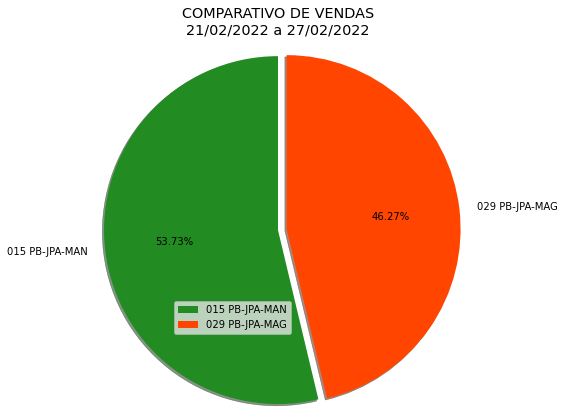

In [29]:
# ETAPA 9/13
# - - -
# GERAR GRÁFICO de segmentação das unidades
# comparativo em percentual das vendas
# - - -
# by geanclm in 12/06/2021
# - - -
total = [man_mag_df['VENDAS_MAN'].sum(),man_mag_df['VENDAS_MAG'].sum()]
unidade = ['015 PB-JPA-MAN','029 PB-JPA-MAG']
explode = [0,0.1]
# plt.figure(figsize=(4,4))
plt.title('COMPARATIVO DE VENDAS\n'+datai+ ' a ' +dataf+'\n\n\n\n\n')
plt.pie(total, labels=unidade, explode=explode, autopct='%1.2f%%', startangle=90, shadow=True,
        radius=2, colors = ['forestgreen', 'orangered'])
plt.legend(unidade, loc=3);

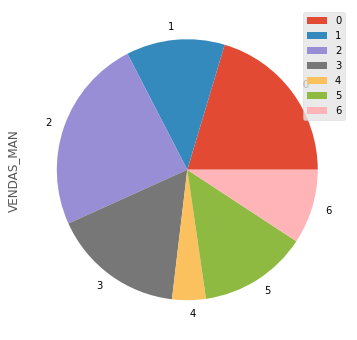

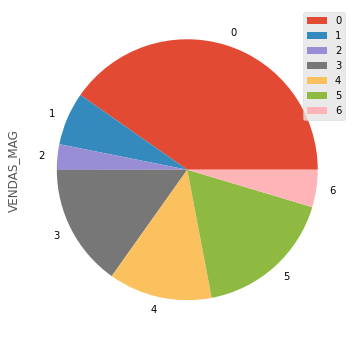

In [30]:
# ETAPA 10/13
# - - -
# gerando gráficos menores de segmaentação para verificar cada dia de venda
# - - -
# by geanclm in 12/06/2021
# - - -

# plot = df.plot.pie(y='mass', figsize=(5, 5))
# plot = df.plot.pie(subplots=True, figsize=(11, 6))

man_mag_df.plot.pie(y='VENDAS_MAN',subplots=True, figsize=(8, 6), )
man_mag_df.plot.pie(y='VENDAS_MAG',subplots=True, figsize=(8, 6));

# Automation - part 2

In [ ]:
# ETAPA 11/13 - PARTE 1
# - - -
# REGISTRAR o FATURAMENTO semanal no site webmin do Shopping
# - - -
# by geanclm
# - - -

# autenticação sistema web gim
with open(DirDataFile,'r') as data : login = (data.readlines()[4])
with open(DirDataFile,'r') as data : senha = (data.readlines()[5])
# - - -
    
nav = webdriver.Chrome()

with open(DirDataFile,'r') as data : link1 = (data.readlines()[20])
link1 = link1[:50]
    
data_ano = str(date.today())
ano = data_ano [0:4]
hifen = "-"

# separando o número do mês para o relatório
# - - -
# data_mes = str(date.today()) # opção retorna o mês atual
# mes = data_mes [6:7]
mes = datai[4] # retorna o mês referente ao período do relatório
# - - -

link2 = "-01&semanas="

di = datai [0:2]
df = dataf [0:2]

linkf = str(link1+ano+hifen+mes+link2+di+hifen+df)
    
with open(DirDataFile,'r') as data : navget = (data.readlines()[21])
nav.get(navget)

pyperclip.copy(login)
pyautogui.hotkey('ctrl','v')
pyautogui.press('tab')
pyperclip.copy(senha)
pyautogui.hotkey('ctrl','v')
pyautogui.press('enter')
time.sleep(1)
pyautogui.press('enter')

time.sleep(1)
pyautogui.click(919,89, clicks=1)
pyperclip.copy(linkf)
pyautogui.hotkey('ctrl','v')
time.sleep(1)
pyautogui.press('enter')
time.sleep(1)
pyautogui.press('enter')

time.sleep(3)
nav.find_element_by_xpath('//*[@id="valida_total"]').click()
nav.find_element_by_xpath('//*[@id="valida_total"]').send_keys(soma_man)
time.sleep(3)

vendas = man_mag_df_string['VENDAS_MAN'].tolist()
for i in (range (0,len(vendas))):
    time.sleep(1)
    nav.find_element_by_xpath('//*[@id="gridtabela"]/tbody/tr['+(str(i+1))+']/td[2]/table/tbody/tr/td/input').click()
    nav.find_element_by_xpath('//*[@id="gridtabela"]/tbody/tr['+(str(i+1))+']/td[2]/table/tbody/tr/td/input').send_keys(vendas[i])
    
# clicando em salvar para encaminhar as informações
time.sleep(3)
pyautogui.press('tab')
time.sleep(1)
pyautogui.press('enter')
time.sleep(3)
pyautogui.click(886,225, clicks=1)
time.sleep(2)

In [ ]:
# script para descobrir posição do cursor na tela
time.sleep(3)
print(pyautogui.position())

In [ ]:
# ETAPA 11/13 - PARTE 2
# - - -
# SALVAR COMPROVANTE DE ENVIO do FATURAMENTO .pdf
# - - -
# by geanclm
# - - -
time.sleep(3) # tempo para posicionar o cursos na tela do web mim

pyautogui.click(80,590, clicks=1)
time.sleep(3)
pyautogui.click(830,168, clicks=1)
time.sleep(3)
pyautogui.click(790,228, clicks=1)
time.sleep(3)
pyautogui.click(700,692, clicks=1)
time.sleep(5)

# SALVAR com o nome correto do arquivo
pyperclip.copy(datai[0:2]+'-'+dataf[0:2]+'_'+datai[3:5]+'_'+datai[6:10])
pyautogui.hotkey('ctrl','v')
time.sleep(2)

# salvar na pasta data
pyautogui.click(521,60, clicks=1)
time.sleep(2)

pyperclip.copy(FileDir)
pyautogui.hotkey('ctrl','v')
time.sleep(2)
pyautogui.press('enter')
time.sleep(2)
pyautogui.click(767,562, clicks=1)
# - - -

# sair do sistema
time.sleep(2)
pyautogui.click(220,521, clicks=1)
time.sleep(2)
pyautogui.click(122,36, clicks=1)
time.sleep(2)

# fechar janela do navegador chrome
pyautogui.click(1276,42, clicks=1)
time.sleep(2)

# avisar que acabo 
pyautogui.alert('''

∩ │◥███◣ ╱◥███◣
╱◥◣ ◥████◣▓∩▓│∩ ║
│╱◥█◣║∩∩∩ ║◥█▓ ▓█◣
││∩│ ▓ ║∩田│║▓ ▓ ▓∩ ║
-=-=-=-=-=-=-=-=-=-=-

FORMULÁRIO
PREENCHIDO COM
SUCESSO!
''')

In [6]:
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# executar para copiar o df origianal
# e tratar dados para envio correto de relatório
# pensar em outra alternativa para essa situação
# by geanclm in 09/08/2021
df = copy.deepcopy(man_mag_df)
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# ETAPA 12/13
# - - -
# Envio de E-mail
# FATURAMENTO SEMANAL para o shopping
# - - -
# by geanclm in 09/07/2021
# - - -

# # -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# # PREPARANDO o data frane man_df para envio - Versão 1.0
# fat = man_mag_df_total
# fat = fat.rename(columns={'VENDAS_MAN': 'VENDAS'})
# fat = fat.drop(columns=['VENDAS_MAG', 'TOTAL'])
# # fat.loc['TOTAL', ['DATA','SEMANA','VENDAS']]
# fat = fat.replace({'dom':'Domingo','seg':'Segunda-feira','ter':'Terça-feira',
#                    'qua':'Quarta-feira','qui':'Quinta-feira','sex':'Sexta-feira',
#                    'sáb':'Sábado'})
# # eliminando o retorno nulo da finção sum()
# # fat.at['TOTAL','DATA']=''
# # fat.at['TOTAL','SEMANA']=''
# fat['DATA'] = fat['DATA'].astype(str)
# fat['DATA'] = fat['DATA'].str.replace('00:00:00','')
# fat = fat.rename(columns={'SEMANA':'DIA','VENDAS':'VENDA'})
# pd.set_option('display.precision',2)
# # -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


# -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# PREPARANDO o data frane man_df para envio - Versão 2.0
# INSERIDNO R$ NOS VALORES DA COLUNA VENDA
# - - -
# by geanclm in 03/08/2021 19:23h
# - - -

locale.setlocale(locale.LC_ALL,'')
vm = []
i = 0
while i < df['VENDAS_MAN'].count():
    vm.append(locale.currency(df['VENDAS_MAN'].loc[i], grouping=True )) 
    i=i+1
df['VENDAS_MAN'] = vm
# - - - 

# TRATAMENTO DO DATA FRAME
df = df.rename(columns={'VENDAS_MAN': 'VENDA'})
df = df.drop(columns=['VENDAS_MAG'])
df = df.rename(columns={'SEMANA': 'DIA'})
df = df.replace({'dom':'Domingo','seg':'Segunda-feira','ter':'Terça-feira',
                   'qua':'Quarta-feira','qui':'Quinta-feira','sex':'Sexta-feira',
                   'sáb':'Sábado'})

# AJUSTANDO a linha TOTAL e coluna VENDA para o formato de moeda brasileira
df.loc['TOTAL'] = locale.currency(soma_man_cifra, grouping=True )
df.at['TOTAL','DATA']=''
df.at['TOTAL','DIA']=''
df['DATA'] = df['DATA'].astype(str)
df['DATA'] = df['DATA'].str.replace('00:00:00','')
fat = df
pd.set_option('display.precision',2)
# -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



# convertendo data frane en htnl
table_content = fat.to_html(border=0)
context = {'table_content': table_content}

# variáveis - corpo da mensagem HTML com tabela
mensagem = f'''
Olá!<br /><br />
Conforme solicitado,<br />
segue relatório.<br /><br />
<table border="1" bgcolor=#F0F0F0 cellpadding="10" cellspacing="0">
   <thead>
        <tr>
           <th colspan="3"><b>FATURAMENTO SEMANAL</b></th>
       </tr>
   </thead>
   <tbody>
        <tr>
           <th colspan="2">{table_content}</th>
       </tr>
   </tbody>
</table>
<p>Obs: Os valores já foram registrados no sistema Web Gim.
<br /><br />
Atenciosamente,<br />
<b>Magnólia Manaíra Shopping</b>'''
# <p>Os valores foram registrados no sistema Web Gim.

with open(DirDataFile,'r') as data : login = (data.readlines()[6])
with open(DirDataFile,'r') as data : remetente = (data.readlines()[6])    

# LENDO ARQUIVO TEXTO PARA LISTA DE E-MAILS - referencia: https://youtu.be/neCfKlK74a8
file = open(r'C:\Users\geanc\Downloads\DATA SCIENCE\geanclm\data\data_python_project_geanclm\data.txt','r')

lista = []
for linha in file:
    linha = linha.rstrip()
    lista.append(linha.rstrip())
file.close()

# # -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# # LOCAL - envio teste
# toaddr = [lista [8]]
# cc = [lista [9],lista [10]]
# bcc = [lista [11]]
# toaddrs = [toaddr] + cc + bcc
# # -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# SHOPPING - envio definitivo
toaddr = [lista [12]]
cc = [lista [13],lista [14],lista [30]]
bcc = [lista [11]]
toaddrs = [toaddr] + cc + bcc
# -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

destino = ','.join(cc)
# assunto da mensagem
a1 = 'FATURAMENTO SEMANAL - '
a2 = (datai[0:2]+' a '+dataf)
assunto = a1+a2

smtp_server = "smtp.gmail.com"
porta = int(587)

with open(DirDataFile,'r') as data : senha_google_app = (data.readlines()[7])

servidor = smtplib.SMTP(smtp_server, porta)

# msg = MIMEMultipart()
msg = email.message.Message()
msg['From'] = login
msg['To'] = destino
msg['Subject'] = assunto
msg.add_header('Content-Type', 'text/html')
msg.set_payload(mensagem)
# msg.attach(MIMEText(body,'plain'))
# - - 

#OPERACIONAL
servidor.starttls()
servidor.login (login, senha_google_app)
servidor.sendmail (remetente, toaddrs, msg.as_string().encode('utf-8'))
servidor.quit()

# avisar que acabo 
pyautogui.alert('''

∩ │◥███◣ ╱◥███◣
╱◥◣ ◥████◣▓∩▓│∩ ║
│╱◥█◣║∩∩∩ ║◥█▓ ▓█◣
││∩│ ▓ ║∩田│║▓ ▓ ▓∩ ║
-=-=-=-=-=-=-=-=-=-=-

FATURAMENTO
ENVIADO COM
SUCESSO!
''')

'Portuguese_Brazil.1252'

(220, b'2.0.0 Ready to start TLS')

(235, b'2.7.0 Accepted')

{}

(221,
 b'2.0.0 closing connection er6-20020a056870c88600b000e92d5a0003sm1326982oab.27 - gsmtp')

'OK'

In [7]:
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# SMS
# fonte https://www.twilio.com/docs/libraries/python
# pip install twilio
# by geanclm in 29/08/2021 at 15:40h update in 17/03/2022
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
from twilio.rest import Client
# Your Account SID from twilio.com/console
with open(DirDataFile,'r') as data : tas = (data.readlines()[31])
tas = tas[:34]    
account_sid = tas
# Your Auth Token from twilio.com/console
with open(DirDataFile,'r') as data : tat = (data.readlines()[32])
tat = tat[:32]  
auth_token  = tat # verificar quando mudar o token por prática de segurança

client = Client(account_sid, auth_token)

t1 = 'enviado ao Shopping'
t2 = assunto
t3 = ' total de vendas no período: R$'
t4 = soma_man_str
texto = t1+t2+t3+t4

with open(DirDataFile,'r') as data : cel = (data.readlines()[26])
with open(DirDataFile,'r') as data : twi = (data.readlines()[27])
cel = cel[:14]
twi = twi[:12]

# message = client.messages.create(to=cel, from_=twi, body=texto)
message = client.messages.create(
    to= cel,
    from_= twi,
    body= f'_{texto}')
print(message.sid)

SM4824796aa3dc48d4ba697ee3c0357425


In [61]:
with open(DirDataFile,'r') as data : cel = (data.readlines()[26])
with open(DirDataFile,'r') as data : twi = (data.readlines()[27])
cel = cel[:14]
twi = twi[:12]

In [24]:
# df = copy.deepcopy(man_mag_df)
# data frame após envio
# de E-mail e SMS
df

,Período,Data da Entrega,Dia da Semana,Até às
0,07 a 13/03/2022,14/03/2022,Segunda feira,14:00


# Machine learning

In [ ]:
# Machine Learning
# Em fase de estudo...
# Rodar apenas uma vez para armazenar na variável o período do ano 2020
df_2020 = man_mag_df
df_2020

In [ ]:
# Machine Learning
# Rodar apenas uma vez para armazenar na variável o período do ano 2021
df_2021 = man_mag_df
df_2021

In [ ]:
# juntar os períodos de vendas de 2020 e 2021 no mesmo dataframe
man_mag_df = pd.concat([df_2020,df_2021])
man_mag_df

<center style="font-size:18pt; background-color:greenyellow">
    <br/>Aplicando princípio regressão linear de Machine Learning <br/>&nbsp;</center>    

In [ ]:
# ETAPA 13/13
# - - -
# definindo a data como index para MACHINE LEARNING
# - - -
# by geanclm in 09/07/2021
# - - -

# gerar base de dados para análise: solicitar junto a Alterdata
man_mag_df_ml = copy.deepcopy(man_mag_df)
man_mag_df_ml.set_index('DATA',inplace = True)
# man_mag_df_ml.set_index('DATA',verify_integrity=True)
# man_mag_df_ml.reset_index('DATA', col_level=1)
man_mag_df_ml

In [ ]:
# ETAPA 14/13
# - - -
# GERAR gráfico com mais recursos de visualização
# - - -
# by geanclm
# - - -
# import seaborn as sns
pd.options.plotting.backend = "plotly"
df = man_mag_df_ml.drop(columns=['SEMANA'])
df.plot(kind='bar')

In [ ]:
# ETAPA 15/13
# - - -
# EXEMPLO DE PIVOT NO DATA FRAME
# - - -
# by geanclm
# - - -
man_df.pivot(index='DATA', columns='SEMANA', values=('VENDAS_MAN'))

In [ ]:
# utilizando o df man_mag_df
# prever vendas para a unidade MAN
# df_man_maior_venda_dia
man_mag_df_ml = man_mag_df.drop('VENDAS_MAG',1)

In [ ]:
man_mag_df_ml.dtypes

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(man_mag_df_ml.VENDAS_MAN, bins=100);

In [ ]:
man_mag_df_ml

In [ ]:
man_mag_df_ml.loc[man_mag_df_ml.SEMANA=='dom','SEMANA']=1
man_mag_df_ml.loc[man_mag_df_ml.SEMANA=='seg','SEMANA']=2
man_mag_df_ml.loc[man_mag_df_ml.SEMANA=='ter','SEMANA']=3
man_mag_df_ml.loc[man_mag_df_ml.SEMANA=='qua','SEMANA']=4
man_mag_df_ml.loc[man_mag_df_ml.SEMANA=='qui','SEMANA']=5
man_mag_df_ml.loc[man_mag_df_ml.SEMANA=='sex','SEMANA']=6
man_mag_df_ml.loc[man_mag_df_ml.SEMANA=='sáb','SEMANA']=7

In [ ]:
# excluir a coluna data
man_mag_df_ml = man_mag_df_ml.drop('DATA', axis=1)

In [ ]:
man_mag_df_ml

## Separar em variáveis preditivas e variável resposta

In [ ]:
X = man_mag_df_ml.drop('VENDAS_MAN', axis=1)
y = man_mag_df_ml.VENDAS_MAN

## Separação em treino e teste

In [ ]:
X.shape, y.shape

## Importar sklearn

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=.3)

## Treinar o modelo

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=-1)
rf.fit(X_tr, y_tr)

In [ ]:
y_ts

In [ ]:
rf.predict(X_ts)

In [ ]:
erro = y_ts - rf.predict(X_ts)
erro

In [ ]:
erro.mean()

In [ ]:
erro_abs = np.abs(y_ts - rf.predict(X_ts))
erro_abs

In [ ]:
erro_abs.mean()

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_ts, rf.predict(X_ts))

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(y_ts,             bins=np.logspace(1,6.5,100), color='b', alpha=.30, density=True)
plt.hist(rf.predict(X_ts), bins=np.logspace(1,6.5,100), color='r', alpha=.30, density=True)
plt.xscale('log');